# Data Preprocessing:

In [1]:
# Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from pandas.plotting import scatter_matrix
from sklearn.metrics import silhouette_score

# Hierarchical
import scipy.cluster.hierarchy as sch    
#For dendrogram
from sklearn.cluster import AgglomerativeClustering
# K-Means
from sklearn.cluster import KMeans
# DBSCAN
from sklearn.cluster import DBSCAN


In [2]:
# Reading the datset

df = pd.read_csv(r"C:\Users\sahil\Desktop\excelr data science\Assignments\Clustering\EastWestAirlines.csv")

In [3]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
df.shape

(3999, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [6]:
# Checking presence of null values

df.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [7]:
# Lets drop ID column

df = df.drop('ID#', axis = 1  )

In [8]:
df.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


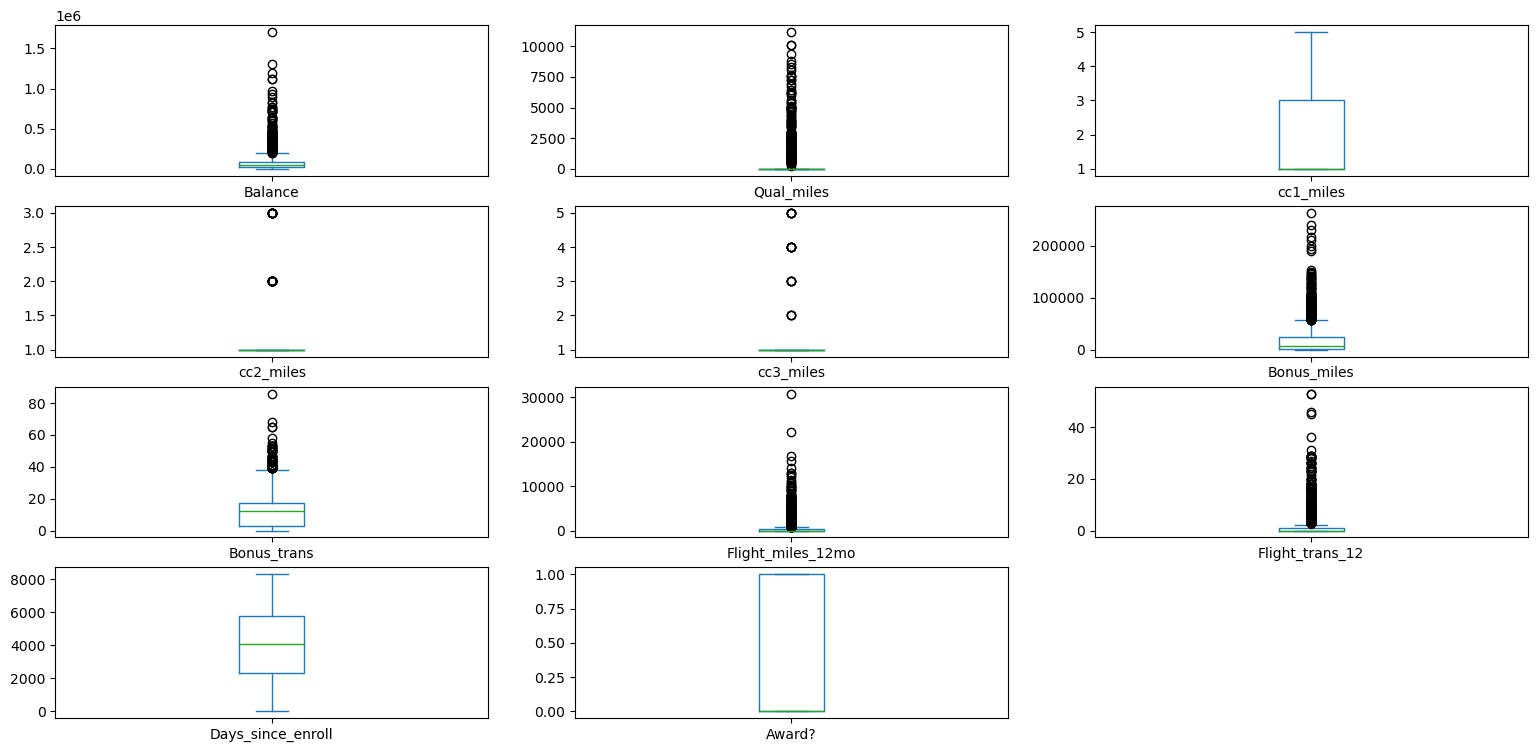

In [9]:
# Data visualization

df.plot(kind='box',subplots=True,layout=(4,3),figsize=(19,9))
plt.show()

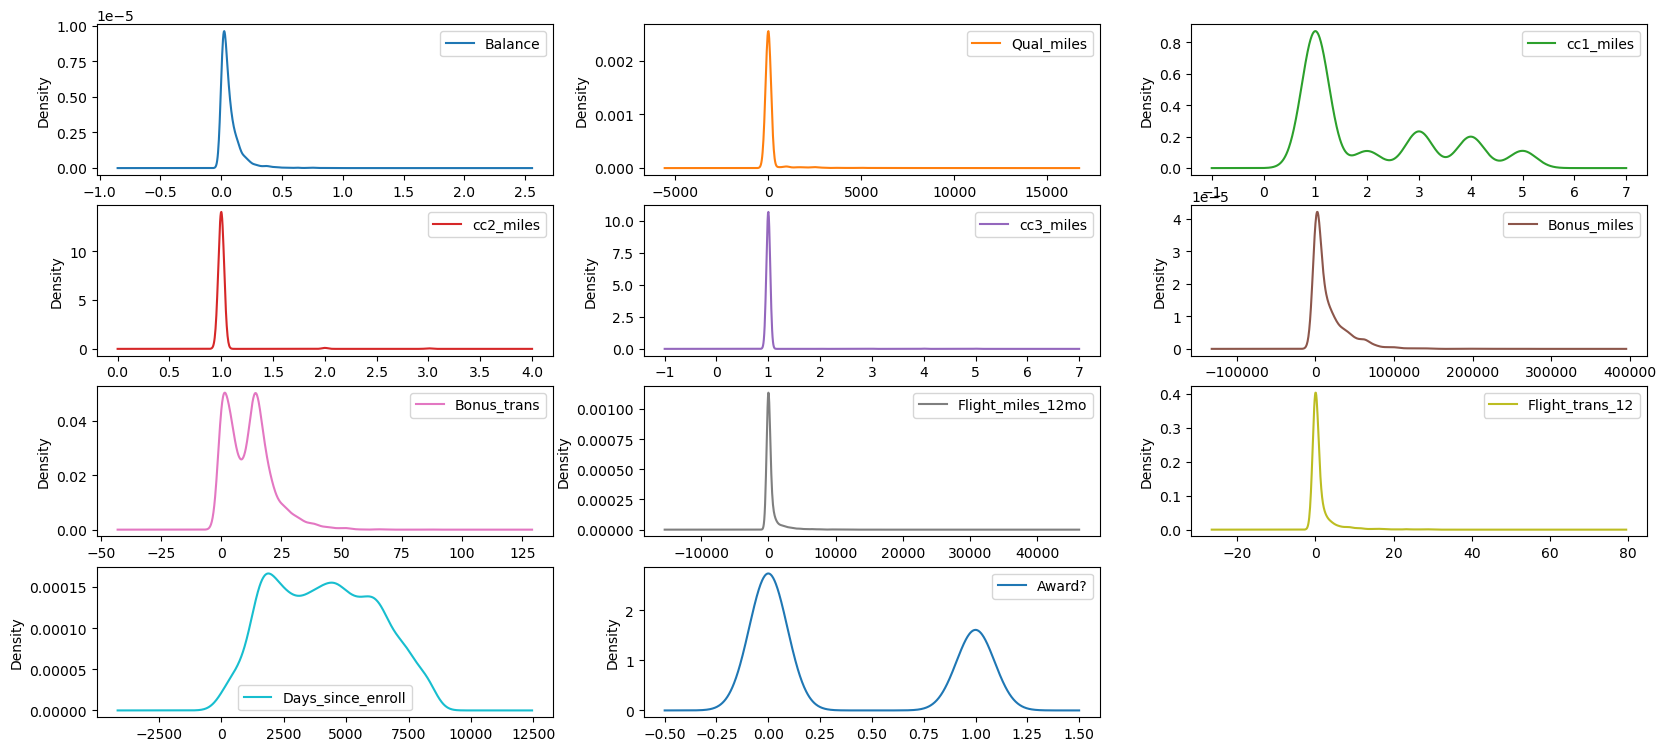

In [10]:
df.plot(kind='density',subplots=True,layout=(4,3),sharex=False, figsize=(20,9))
plt.show()

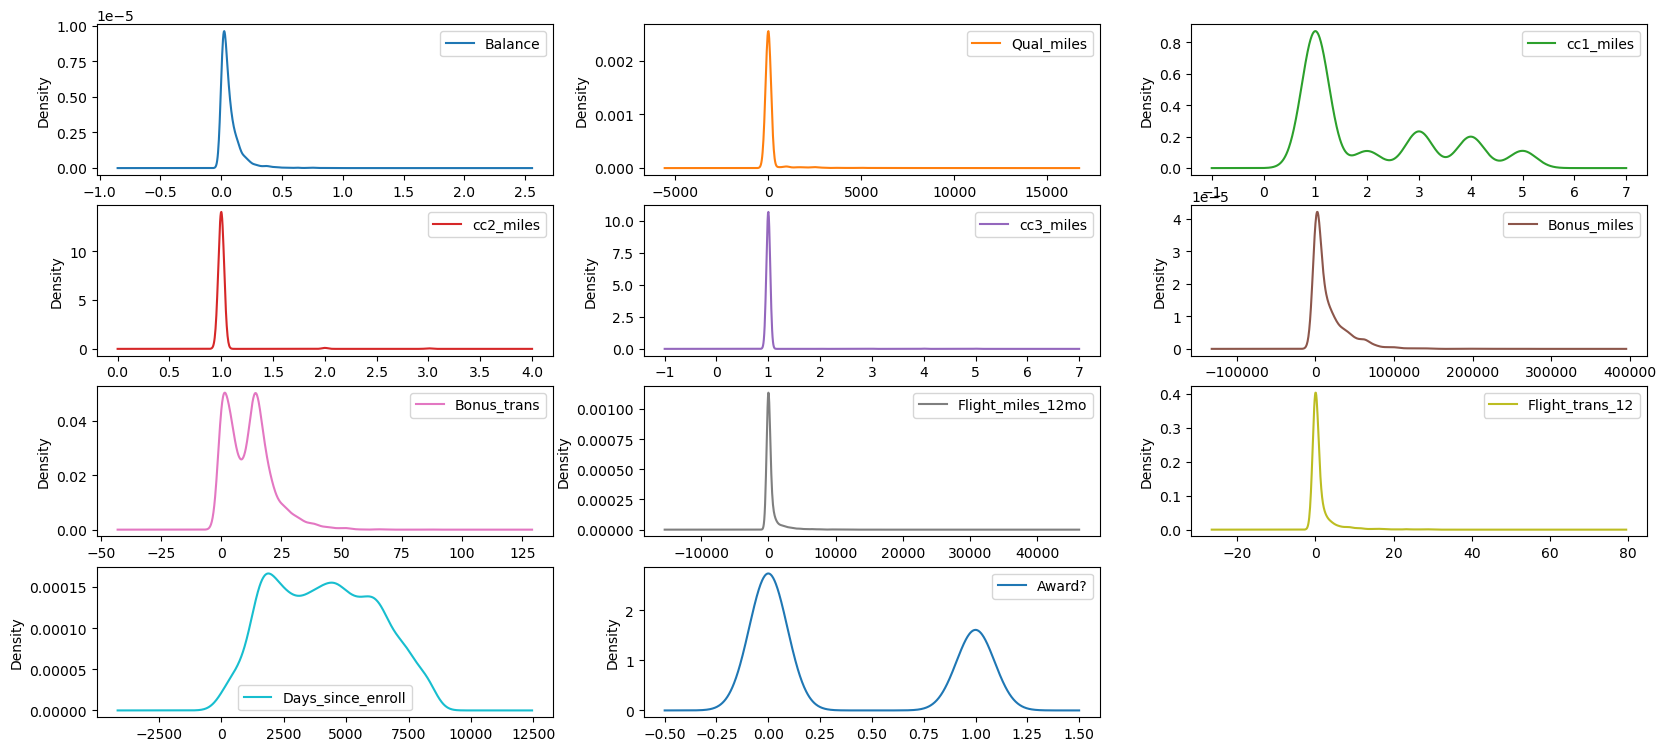

In [11]:
df.plot(kind='density',subplots=True,layout=(4,3),sharex=False, figsize=(20,9))
plt.show()

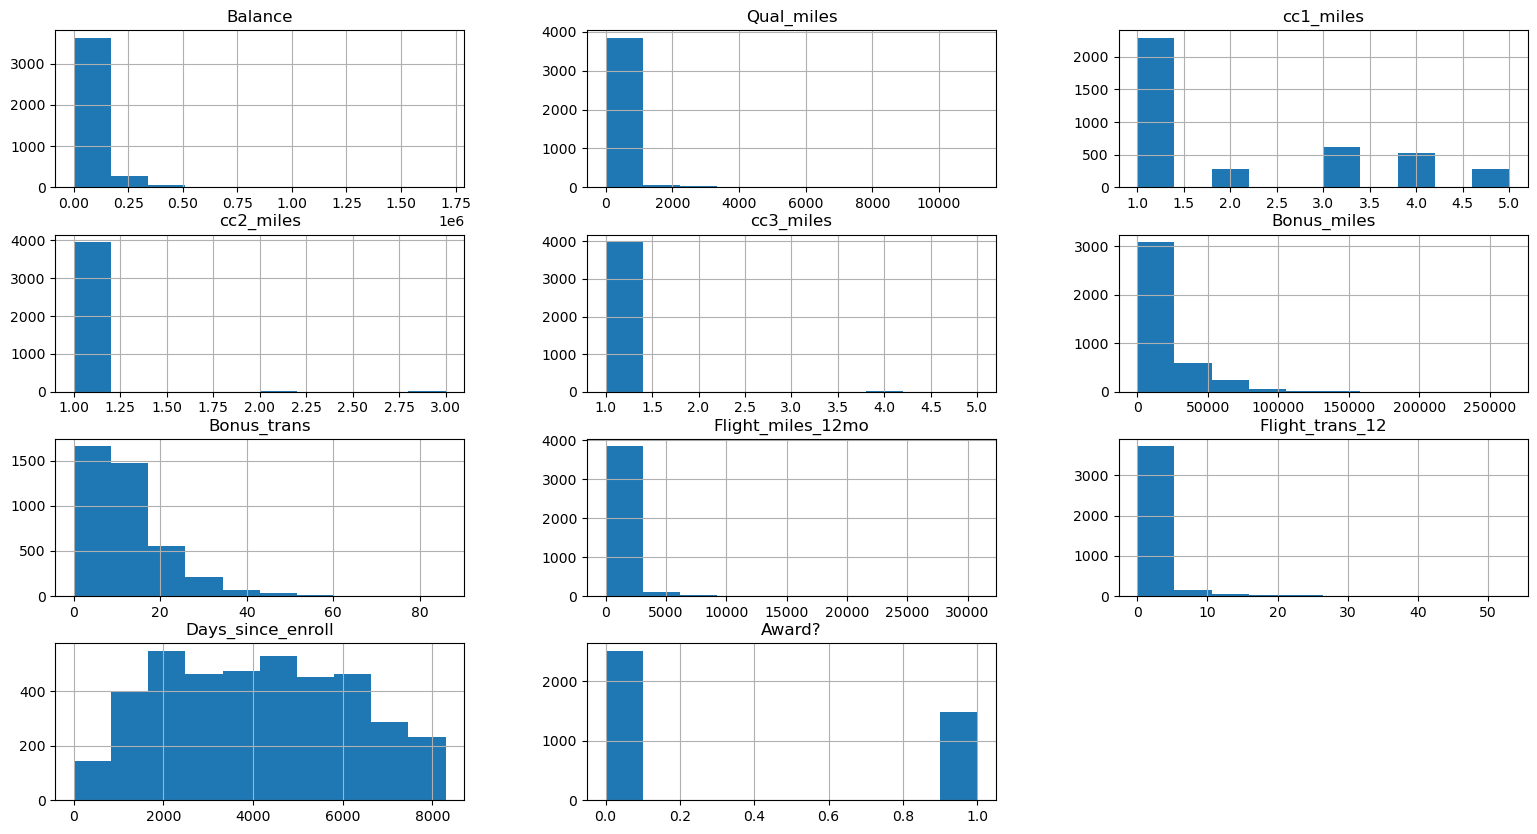

In [12]:
df.hist(figsize=(19,10),layout=(4,3))
plt.show()

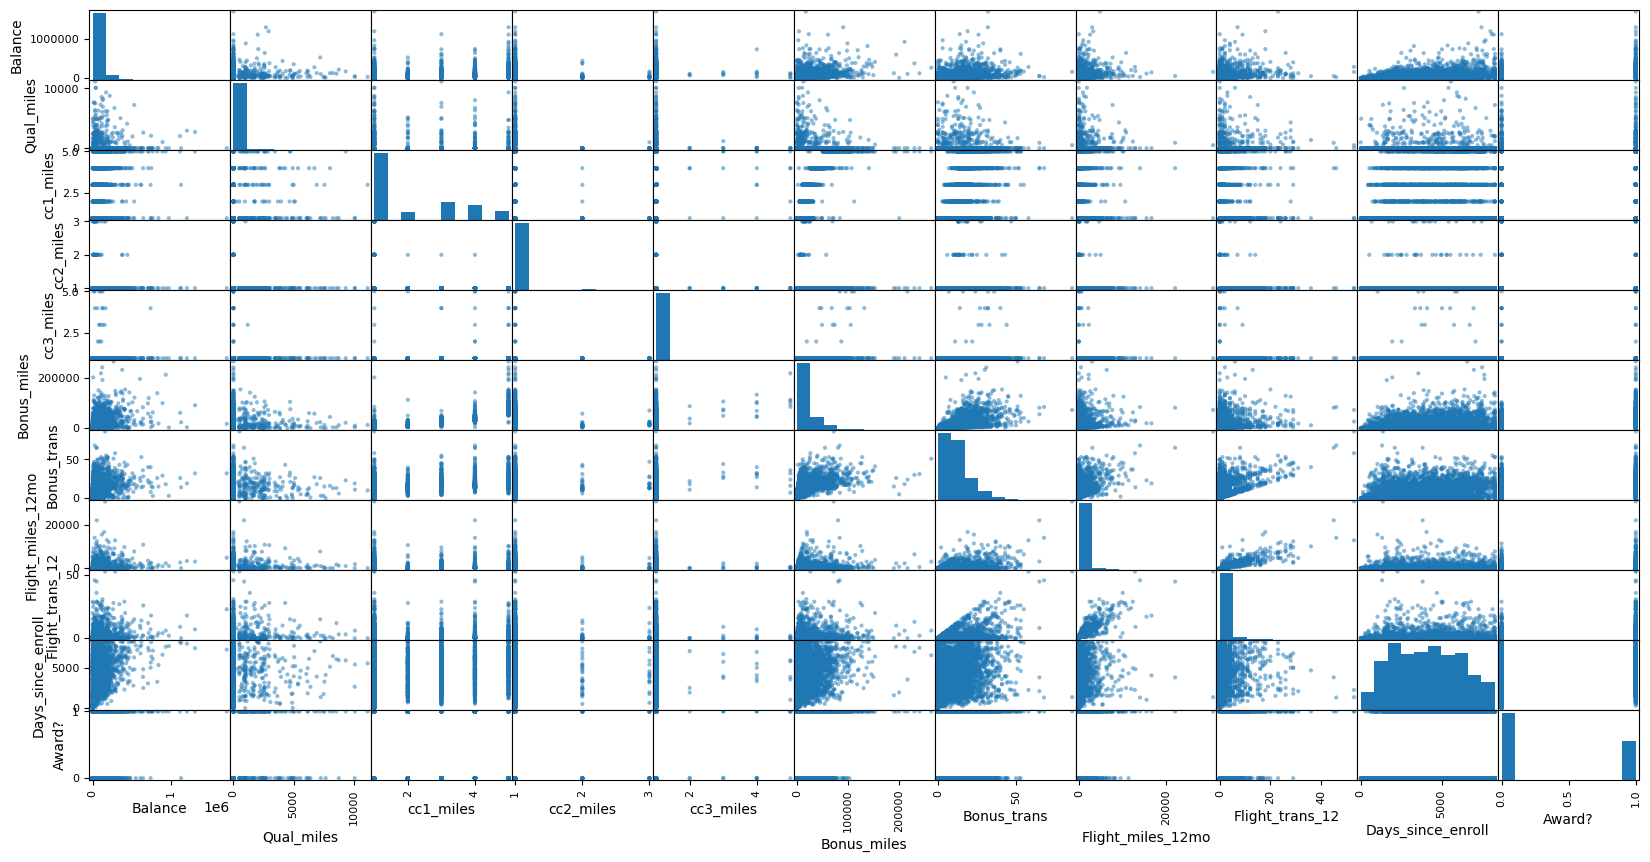

In [13]:
scatter_matrix(df,figsize=(20,10))
plt.show()

In [14]:
# Removing outliers

# Balance

upper_limit = df['Balance'].mean() + 3*df['Balance'].std()
lower_limit = df['Balance'].mean() - 3*df['Balance'].std()

print(upper_limit,lower_limit)

375928.3224566995 -228725.6672929086


In [15]:
df.loc[(df['Balance']>upper_limit)|(df['Balance']<lower_limit)]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
8,443003,0,3,2,1,1753,43,3850,12,6948,1
43,619393,0,3,1,1,15008,14,0,0,7819,1
72,550367,0,3,1,1,12500,13,50,1,7801,0
87,609477,0,3,1,1,21422,22,1200,8,6820,0
117,969559,0,1,1,1,2500,3,1000,2,7718,1
...,...,...,...,...,...,...,...,...,...,...,...
2564,518960,0,1,1,1,15700,8,200,1,2819,1
2656,644881,2600,1,1,1,14350,28,10850,26,2511,1
2709,405499,1000,4,1,1,72318,46,9729,29,2329,1
3040,449205,1121,1,1,1,4750,9,3250,8,3071,1


In [16]:
df.loc[(df['Balance']>upper_limit), 'Balance'] = upper_limit
df.loc[(df['Balance']<lower_limit), 'Balance'] = lower_limit

<Axes: >

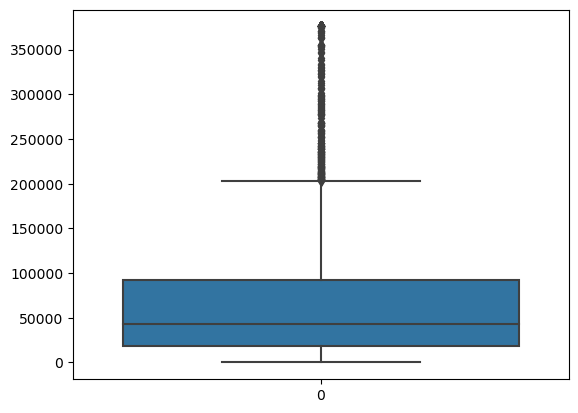

In [17]:
sns.boxplot(df['Balance'])

In [18]:
# Qual_miles

upper_limit = df['Qual_miles'].mean() + 3*df['Qual_miles'].std()
lower_limit = df['Qual_miles'].mean() - 3*df['Qual_miles'].std()

print(upper_limit,lower_limit)

2465.105941810693 -2176.876884546377


In [19]:
df.loc[(df['Qual_miles']>upper_limit)|(df['Qual_miles']<lower_limit)]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
70,84409.000000,5031,2,1,1,15436,16,1150,4,7766,0
220,375928.322457,2706,5,1,1,90653,32,3050,7,7467,1
307,375928.322457,2998,1,1,1,8001,25,3226,15,7326,1
315,119977.000000,2556,1,1,1,9275,16,1400,4,7226,1
335,278457.000000,6727,4,1,1,57313,27,1000,2,7101,1
...,...,...,...,...,...,...,...,...,...,...,...
3643,47662.000000,3071,1,1,1,100,1,100,1,760,0
3649,41537.000000,3576,1,1,1,3000,3,250,1,669,1
3701,8964.000000,3861,1,1,1,0,0,0,0,594,0
3747,6015.000000,4929,1,1,1,0,0,0,0,30,0


In [20]:
df.loc[(df['Qual_miles']>upper_limit), 'Qual_miles'] = upper_limit
df.loc[(df['Qual_miles']<lower_limit), 'Qual_miles'] = lower_limit

<Axes: >

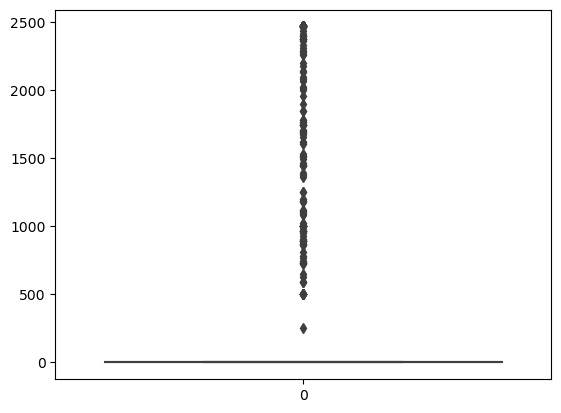

In [21]:
sns.boxplot(df['Qual_miles'])

In [22]:
 #) cc2_miles

upper_limit = df['cc2_miles'].mean() + 3*df['cc2_miles'].std()
lower_limit = df['cc2_miles'].mean() - 3*df['cc2_miles'].std()

print(upper_limit,lower_limit)

1.4574543901105417 0.5715528617024115


In [23]:
df.loc[(df['cc2_miles']>upper_limit)|(df['cc2_miles']<lower_limit)]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
8,375928.322457,0.0,3,2,1,1753,43,3850,12,6948,1
198,8669.000000,0.0,1,3,1,11397,16,0,0,7486,1
226,117329.000000,0.0,1,2,1,6448,11,0,0,7416,1
381,167670.000000,0.0,1,3,1,15907,13,0,0,6994,0
392,11189.000000,0.0,1,2,1,9044,20,0,0,8296,1
561,375928.322457,0.0,2,2,1,22485,25,213,1,6539,1
794,55610.000000,0.0,1,2,1,5095,13,0,0,6151,0
940,44824.000000,0.0,1,3,1,21107,19,2000,4,5916,1
1149,84856.000000,0.0,1,2,1,6894,13,0,0,5547,0
1270,16103.000000,0.0,1,3,1,10819,13,0,0,5427,0


In [24]:
df.loc[(df['cc2_miles']>upper_limit), 'cc2_miles'] = upper_limit
df.loc[(df['cc2_miles']<lower_limit), 'cc2_miles'] = lower_limit

<Axes: >

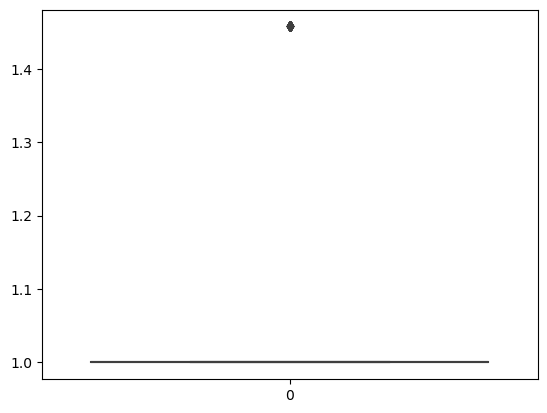

In [25]:
sns.boxplot(df['cc2_miles'])

In [26]:
# 4) Bonus_miles

upper_limit = df['Bonus_miles'].mean() + 3*df['Bonus_miles'].std()
lower_limit = df['Bonus_miles'].mean() - 3*df['Bonus_miles'].std()

print(upper_limit,lower_limit)

89597.74969021088 -55308.05726710511


In [27]:
df.loc[(df['Bonus_miles']>upper_limit)|(df['Bonus_miles']<lower_limit)]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
94,185549.000000,0.0,5,1.0,1,110859,39,2950,16,6778,1
121,205126.000000,0.0,5,1.0,1,126630,45,2250,10,7668,1
126,375928.322457,0.0,5,1.0,1,194753,26,2250,10,7652,1
151,375928.322457,0.0,5,1.0,1,211284,18,2250,6,7640,1
190,123516.000000,0.0,5,1.0,1,240544,31,500,2,7507,1
...,...,...,...,...,...,...,...,...,...,...,...
2549,140398.000000,0.0,5,1.0,1,118013,26,1100,4,2972,1
2840,8557.000000,0.0,1,1.0,1,200622,5,622,3,1955,1
3137,298505.000000,0.0,5,1.0,1,130647,32,600,2,2483,1
3772,375928.322457,0.0,5,1.0,1,138334,26,600,2,3288,1


In [28]:
df.loc[(df['Bonus_miles']>upper_limit), 'Bonus_miles'] = upper_limit
df.loc[(df['Bonus_miles']<lower_limit), 'Bonus_miles'] = lower_limit

<Axes: >

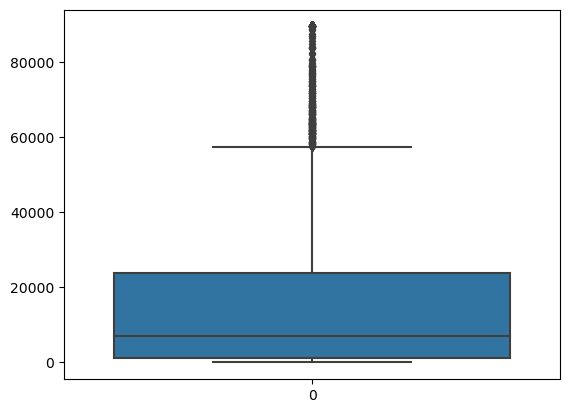

In [29]:
sns.boxplot(df['Bonus_miles'])

In [30]:
# 5) Bonus_trans

upper_limit = df['Bonus_trans'].mean() + 3*df['Bonus_trans'].std()
lower_limit = df['Bonus_trans'].mean() - 3*df['Bonus_trans'].std()

print(upper_limit,lower_limit)

40.413331484013156 -17.20953053377559


In [31]:
df.loc[(df['Bonus_trans']>upper_limit)|(df['Bonus_trans']<lower_limit)]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
8,375928.322457,0.000000,3,1.457454,1,1753.00000,43,3850,12,6948,1
65,53914.000000,0.000000,3,1.000000,1,33767.00000,45,5550,29,6826,1
121,205126.000000,0.000000,5,1.000000,1,89597.74969,45,2250,10,7668,1
127,213150.000000,0.000000,4,1.000000,1,56308.00000,41,5200,14,7645,1
360,22080.000000,0.000000,1,1.000000,1,12200.00000,47,1950,9,7050,1
410,375928.322457,0.000000,5,1.000000,1,25395.00000,53,1750,14,8296,1
444,192104.000000,0.000000,3,1.000000,1,39010.00000,53,1750,8,8289,1
475,171509.000000,0.000000,3,1.000000,1,40090.00000,55,6381,23,8151,1
531,98472.000000,1776.000000,5,1.000000,1,89597.74969,45,10250,28,6621,1
534,267404.000000,0.000000,5,1.000000,1,89597.74969,51,3000,6,6584,1


In [32]:
df.loc[(df['Bonus_trans']>upper_limit), 'Bonus_trans'] = upper_limit
df.loc[(df['Bonus_trans']<lower_limit), 'Bonus_trans'] = lower_limit

<Axes: >

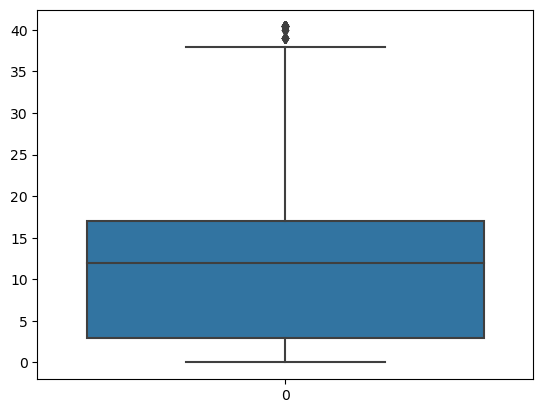

In [33]:
sns.boxplot(df['Bonus_trans'])

In [34]:
# 6) Flight_miles_12mo


upper_limit = df['Flight_miles_12mo'].mean() + 3*df['Flight_miles_12mo'].std()
lower_limit = df['Flight_miles_12mo'].mean() - 3*df['Flight_miles_12mo'].std()

print(upper_limit,lower_limit)

4660.683277958996 -3740.571750077025


In [35]:
df.loc[(df['Flight_miles_12mo']>upper_limit)|(df['Flight_miles_12mo']<lower_limit)]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
50,108137.0,0.0,1,1.0,1,6368.0,5.000000,6368,5,6844,0
65,53914.0,0.0,3,1.0,1,33767.0,40.413331,5550,29,6826,1
112,124198.0,0.0,5,1.0,1,66330.0,23.000000,4833,10,7710,0
127,213150.0,0.0,4,1.0,1,56308.0,40.413331,5200,14,7645,1
135,259484.0,1776.0,1,1.0,1,19172.0,26.000000,7172,23,6723,1
...,...,...,...,...,...,...,...,...,...,...,...
3824,5500.0,0.0,1,1.0,1,5500.0,11.000000,5500,11,1690,0
3846,97510.0,1678.0,5,1.0,1,71609.0,40.413331,7650,26,1665,1
3907,126490.0,0.0,1,1.0,1,8808.0,15.000000,5183,12,1566,0
3917,130748.0,0.0,4,1.0,1,65510.0,37.000000,6349,7,1545,0


In [36]:
df.loc[(df['Flight_miles_12mo']>upper_limit), 'Flight_miles_12mo'] = upper_limit
df.loc[(df['Flight_miles_12mo']<lower_limit), 'Flight_miles_12mo'] = lower_limit

<Axes: >

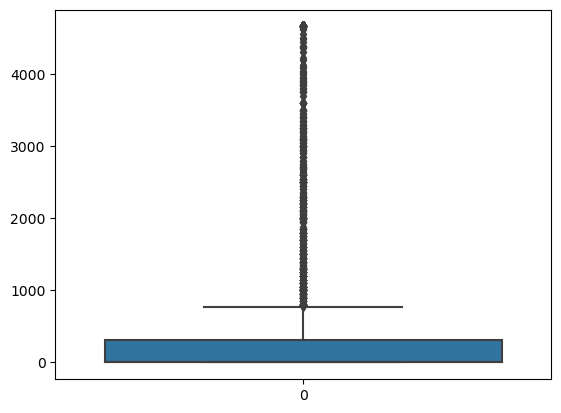

In [37]:
sns.boxplot(df['Flight_miles_12mo'])

In [38]:
# 7) Flight_trans_12

upper_limit = df['Flight_trans_12'].mean() + 3*df['Flight_trans_12'].std()
lower_limit = df['Flight_trans_12'].mean() - 3*df['Flight_trans_12'].std()

print(upper_limit,lower_limit)

12.75311063317514 -10.005923836475965


In [39]:
df.loc[(df['Flight_trans_12']>upper_limit)|(df['Flight_trans_12']<lower_limit)]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
65,53914.0,0.0,3,1.000000,1,33767.00000,40.413331,4660.683278,29,6826,1
94,185549.0,0.0,5,1.000000,1,89597.74969,39.000000,2950.000000,16,6778,1
127,213150.0,0.0,4,1.000000,1,56308.00000,40.413331,4660.683278,14,7645,1
135,259484.0,1776.0,1,1.000000,1,19172.00000,26.000000,4660.683278,23,6723,1
191,143080.0,733.0,4,1.000000,1,44373.00000,38.000000,3928.000000,17,7575,1
...,...,...,...,...,...,...,...,...,...,...,...
3788,374613.0,0.0,1,1.457454,1,23592.00000,31.000000,4660.683278,14,3463,1
3806,122488.0,0.0,1,1.000000,1,2800.00000,17.000000,1300.000000,16,1718,1
3846,97510.0,1678.0,5,1.000000,1,71609.00000,40.413331,4660.683278,26,1665,1
3911,55922.0,2273.0,1,1.000000,1,8104.00000,19.000000,4104.000000,16,1552,0


In [40]:
df.loc[(df['Flight_trans_12']>upper_limit), 'Flight_trans_12'] = upper_limit
df.loc[(df['Flight_trans_12']<lower_limit), 'Flight_trans_12'] = lower_limit

<Axes: >

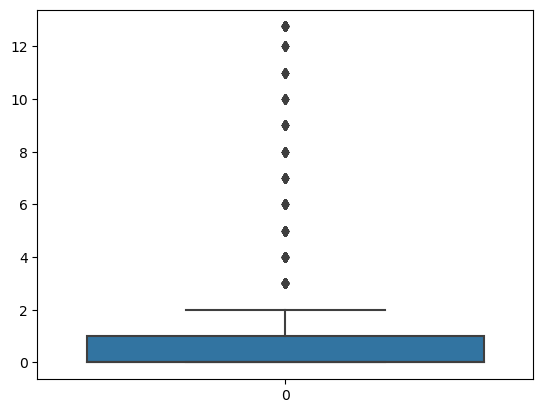

In [41]:
sns.boxplot(df['Flight_trans_12'])

In [42]:
# Standardizing the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [43]:
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03
mean,-9.950086e-17,-1.066081e-17,1.705729e-16,-1.382351e-15,1.350369e-16,-1.137153e-16,-1.990017e-16,-1.101617e-16,-1.776801e-17,5.685763e-17,1.421441e-17
std,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00
min,-9.072273e-01,-2.247446e-01,-7.695784e-01,-1.042572e-01,-6.276658e-02,-7.813063e-01,-1.248451e+00,-4.218910e-01,-4.445760e-01,-1.993611e+00,-7.669193e-01
25%,-6.664111e-01,-2.247446e-01,-7.695784e-01,-1.042572e-01,-6.276658e-02,-7.222599e-01,-9.228806e-01,-4.218910e-01,-4.445760e-01,-8.661823e-01,-7.669193e-01
50%,-3.470622e-01,-2.247446e-01,-7.695784e-01,-1.042572e-01,-6.276658e-02,-4.425688e-01,5.382946e-02,-4.218910e-01,-4.445760e-01,-1.092530e-02,-7.669193e-01
75%,2.938191e-01,-2.247446e-01,6.831212e-01,-1.042572e-01,-6.276658e-02,3.429612e-01,5.964462e-01,-9.008583e-02,-7.048930e-02,8.097050e-01,1.303918e+00
max,3.979004e+00,5.401541e+00,2.135821e+00,9.591663e+00,2.042732e+01,3.451035e+00,3.137339e+00,4.550581e+00,4.326193e+00,2.023095e+00,1.303918e+00


In [44]:
df_scaled.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.541431,-0.224745,-0.769578,-0.104257,-0.062767,-0.773087,-1.139927,-0.421891,-0.444576,1.395454,-0.766919
1,-0.657098,-0.224745,-0.769578,-0.104257,-0.062767,-0.771150,-1.031404,-0.421891,-0.444576,1.379957,-0.766919
2,-0.369717,-0.224745,-0.769578,-0.104257,-0.062767,-0.586548,-0.814357,-0.421891,-0.444576,1.411920,-0.766919
3,-0.715172,-0.224745,-0.769578,-0.104257,-0.062767,-0.757688,-1.139927,-0.421891,-0.444576,1.372208,-0.766919
4,0.363331,-0.224745,1.409471,-0.104257,-0.062767,1.264062,1.573156,1.794055,1.051771,1.363975,1.303918


In [45]:
print(type(df_scaled))

<class 'pandas.core.frame.DataFrame'>


In [46]:
# Convert to a NumPy array if it's not already
if isinstance(df_scaled, pd.DataFrame):
    df_scaled = df_scaled.values


In [47]:
print(type(df_scaled))

<class 'numpy.ndarray'>


# Model Building


# 1) K-means clustering :


In [48]:
# Finding the optimal number of clusters using the Elbow method

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(df_scaled)
    inertia.append(kmeans.inertia_)


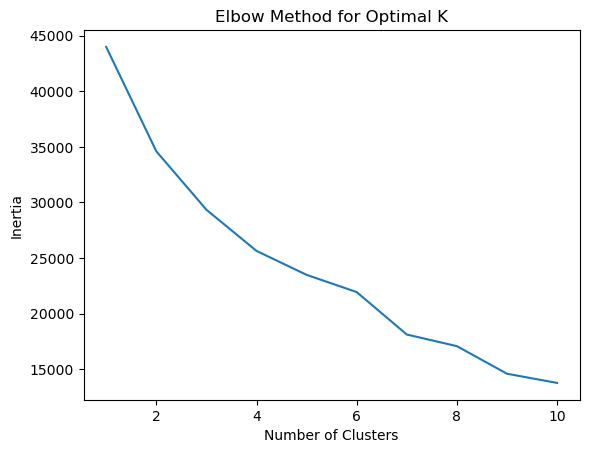

In [49]:
# Plotting the elbow curve
plt.plot(range(1, 11), inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()


In [50]:
# Here we can see sharp drop till 6 cluster after which it slowed down, so lets select cluster = 6 and implement K-means

kmeans = KMeans(n_clusters=6, random_state=0)
kmeans_labels = kmeans.fit_predict(df_scaled)



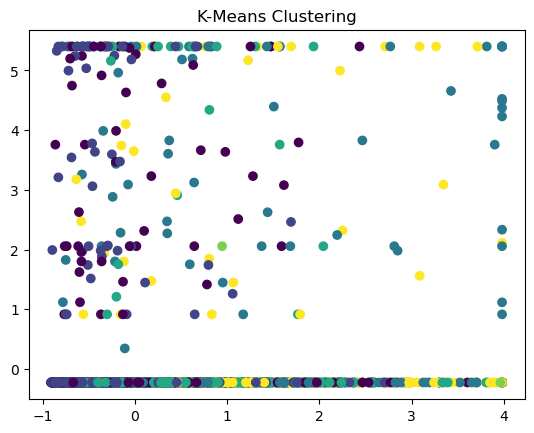

In [51]:
# Visualizing the clusters

plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-Means Clustering')
plt.show()



In [52]:
print(type(kmeans_labels))
print(kmeans_labels.shape)


<class 'numpy.ndarray'>
(3999,)


In [53]:
print(df_scaled.shape)


(3999, 11)


In [54]:
import pandas as pd

if not isinstance(df_scaled, pd.DataFrame):
    df_scaled = pd.DataFrame(df_scaled)



In [55]:
# Add cluster labels to the dataset

df_scaled['KMeans_Cluster'] = kmeans_labels

# 2)  Hierarchical Clustering:

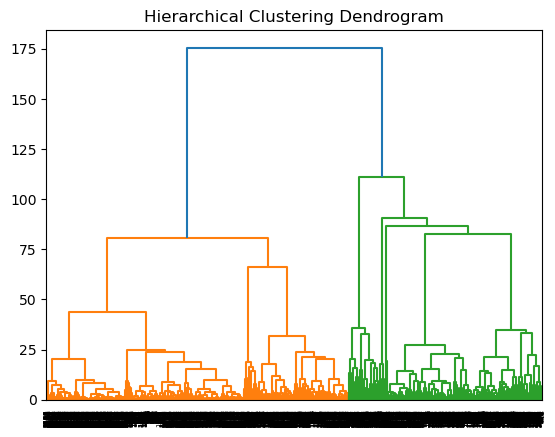

In [56]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster



# Applying Hierarchical Clustering with Ward's method and plotting the dendrogram

linkage_matrix = linkage(df_scaled, method='ward')
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

In [60]:
# Set a threshold to cut the dendrogram and form clusters

linked = linkage(df_scaled, method='ward')
hierarchical_labels = fcluster(linked, t=3, criterion='maxclust')

In [62]:
# Add cluster labels to the dataset

df_scaled['Hierarchical_Cluster'] = hierarchical_labels

# 3) DBSCAN Clustering:

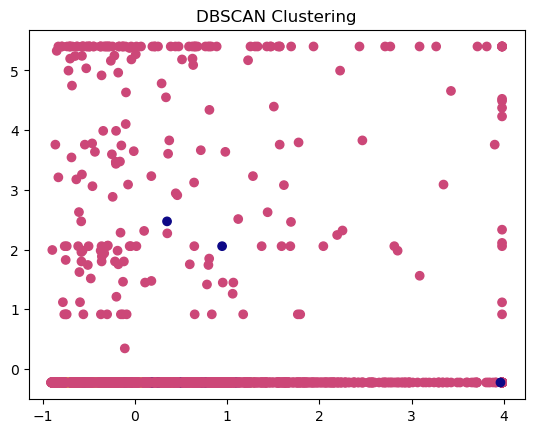

In [59]:
# Convert DataFrame to a NumPy array
df_scaled_array = df_scaled.values


# Applying DBSCAN (adjust epsilon and min_samples based on dataset characteristics)
dbscan = DBSCAN(eps=4, min_samples=10)
dbscan_labels = dbscan.fit_predict(df_scaled_array)

# Visualizing the DBSCAN clusters
plt.scatter(df_scaled_array[:, 0], df_scaled_array[:, 1], c=dbscan_labels, cmap='plasma')
plt.title('DBSCAN Clustering')
plt.show()

In [64]:
# Add cluster labels to the dataset

df_scaled['DBSCAN_Cluster'] = dbscan_labels

# 4) Visualization

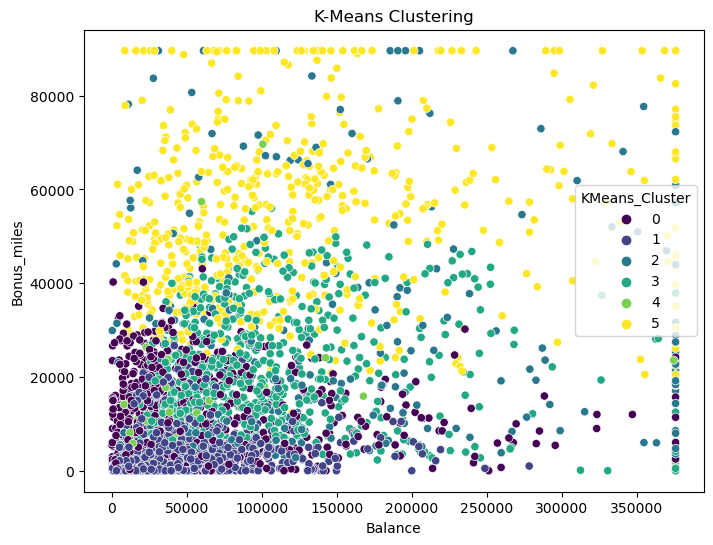

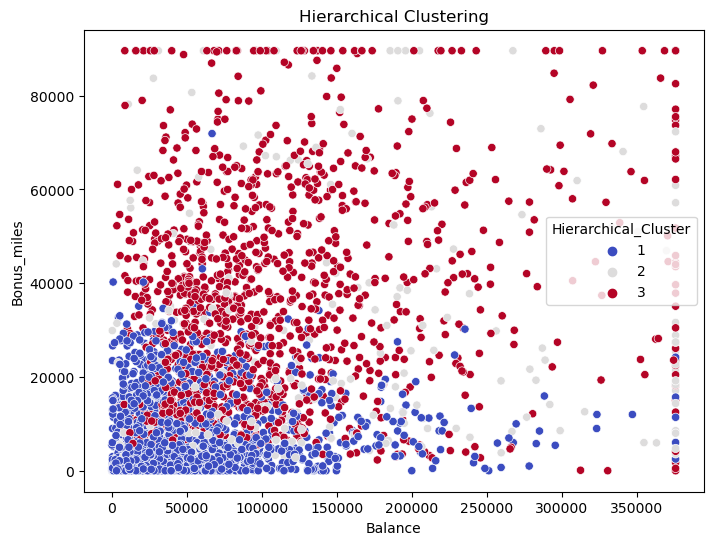

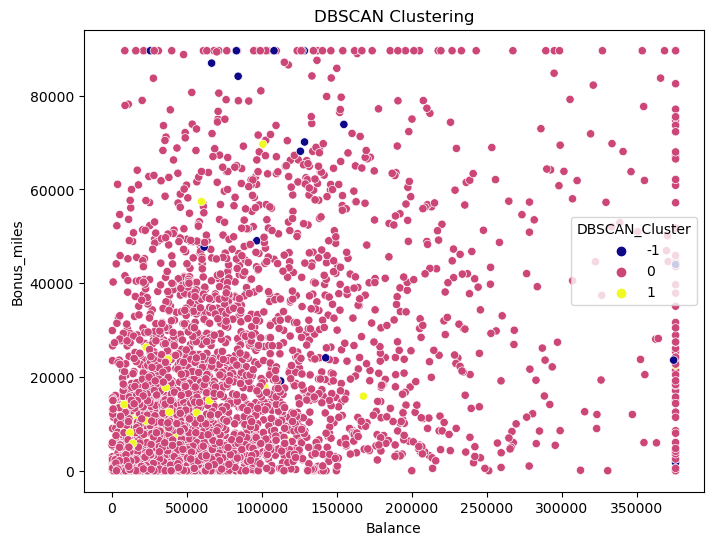

In [69]:
# Visualize K-Means Clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Balance'], y=df['Bonus_miles'], hue=df_scaled['KMeans_Cluster'], palette='viridis')
plt.title('K-Means Clustering')
plt.show()

# Visualize Hierarchical Clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Balance'], y=df['Bonus_miles'], hue=df_scaled['Hierarchical_Cluster'], palette='coolwarm')
plt.title('Hierarchical Clustering')
plt.show()

# Visualize DBSCAN Clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Balance'], y=df['Bonus_miles'], hue=df_scaled['DBSCAN_Cluster'], palette='plasma')
plt.title('DBSCAN Clustering')
plt.show()


# 5) Evaluation and Performance Metrics:

In [71]:
# K-Means
kmeans_labels = df_scaled['KMeans_Cluster']
kmeans_silhouette = silhouette_score(df_scaled, kmeans_labels)

# DBSCAN
dbscan_labels = df_scaled['DBSCAN_Cluster']
dbscan_silhouette = silhouette_score(df_scaled, dbscan_labels)

# Print silhouette scores for comparison
print(f'Silhouette Score for K-Means: {kmeans_silhouette}')
print(f'Silhouette Score for DBSCAN: {dbscan_silhouette}')


Silhouette Score for K-Means: 0.3572676304954516
Silhouette Score for DBSCAN: 0.5899525081424322
